In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("dataWithSomeReformatting.xlsx", index_col = [0])
data.rename(columns={key: str(key).replace("_", " ").title() for key in data}, inplace= True)
data["General Outcome"][data["Environmental Outcome"]==1]=1
data["General Outcome"][data["Health Outcome"]==1]=1
keys = list(data.keys())
list(data.keys())

C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


['Article Title',
 'Article Link',
 'General Outcome',
 'General Outcome (1,0)',
 'Desc General Outcome',
 'Daily Intake',
 'Descr Daily Intake',
 'Health Outcome',
 'Descr Health Outcome',
 'Environmental Outcome',
 'Descr Environmental Outcome',
 'Fund Source',
 'Fund Source',
 'Author Affiliation',
 'Loc Authors',
 'Loc Experiment',
 'Year',
 'Journal',
 'Loc Journal',
 'Loc Editor Journal',
 'Current Impact Factor',
 'Impact F Publishing Year',
 'Num Citations',
 'Public',
 'Private',
 'University',
 'International',
 'Research',
 'Slovak Republic',
 'Ecuador',
 'Poland',
 'Morocco',
 'Austria',
 'Argentina',
 'Sweden',
 'Spain',
 'Hungary',
 'Cameroon',
 'Colombia',
 'Brazl',
 'Serbia',
 'Thailand',
 'Iraq',
 'South Africa',
 'Denmark',
 'Switzerland',
 'Republic Of Korea',
 'Sri Lanka',
 'Italy',
 'Finland',
 'Egypt',
 'Iran',
 'Netherlands',
 'Belgium',
 'Turkey',
 'Greece',
 'Slovenia',
 'Ukraine',
 'India',
 'Nigeria',
 'Brazil',
 'Romania',
 'China',
 'Uk',
 'Germany',
 'New 

In [3]:
years = keys[-31:]
countries = keys[-82:-31]
data.rename(columns = {year:str(year) for year in years}, inplace = True)
years = [str(year) for year in years]
data

,Article Title,Article Link,General Outcome,"General Outcome (1,0)",Desc General Outcome,Daily Intake,Descr Daily Intake,Health Outcome,Descr Health Outcome,Environmental Outcome,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,1,1,Found glyphosate in soil and sediment,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,1,0,0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,1,1,High glyphosate levels above maximum permissib...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,0,0,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,1,1,Health risks associated with the indiscrimina...,NaN,NaN,1,"Health risk, presence of glyphosate in many po...",0,...,0,0,0,0,0,1,0,0,0,0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,0,0,It was concluded that the transgenic soybean ...,NaN,NaN,0,No negative effect,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Effect of glyphosate herbicide on acetylcholin...,https://doi.org/10.1016/j.ecoenv.2005.07.017,1,1,The present study reveals that exposure of L. ...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
499,Comparative cyto- and genotoxicity assessment ...,https://doi.org/10.1016/j.envres.2019.108851,1,1,the GBHs-induced DNA damage observed in the co...,NaN,NaN,1,the GBHs-induced DNA damage observed in the co...,0,...,0,0,0,0,0,0,0,1,0,0
500,Genotoxic effects of glyphosate on Physalaemus...,https://doi.org/10.1016/j.etap.2020.103516,1,1,Glyphosate herbicide can be considered a genot...,NaN,NaN,1,Glyphosate herbicide can be considered a genot...,0,...,0,0,0,0,0,0,0,0,0,1
501,Ecotoxicological risk assessment for the herbi...,https://doi.org/10.1016/j.envpol.2017.10.100,1,1,Potential adverse effect on aquatic invertebrates,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
### drop Iran due to colinearity
#del years[0]
keys =["General Outcome",
       #"Health Outcome",
       #"Environmental Outcome",
       'Num Citations',
       'Public',
       'Private',
       'University',
       'International',
       'Research',
       "Impact F Publishing Year"]
keys = keys #+ countries
#keys = ["General_outcome", "Year", "Fund_Source", "Loc_experiment", "Journal"]
max_cond_vars = len(keys) - 2
data = data[keys + countries].dropna()
data["Impact F Publishing Year"] = data["Impact F Publishing Year"].astype(float)
data.dtypes

General Outcome               int64
Num Citations               float64
Public                        int64
Private                       int64
University                    int64
International                 int64
Research                      int64
Impact F Publishing Year    float64
Slovak Republic               int64
Ecuador                       int64
Poland                        int64
Morocco                       int64
Austria                       int64
Argentina                     int64
Sweden                        int64
Spain                         int64
Hungary                       int64
Cameroon                      int64
Colombia                      int64
Brazl                         int64
Serbia                        int64
Thailand                      int64
Iraq                          int64
South Africa                  int64
Denmark                       int64
Switzerland                   int64
Republic Of Korea             int64
Sri Lanka                   

In [5]:
data

,General Outcome,Num Citations,Public,Private,University,International,Research,Impact F Publishing Year,Slovak Republic,Ecuador,...,Canada,Japan,Mexico,Portugal,Usa,Latvia,Norway,Ireland,Taiwan,Tunisia
0,1,1.0,1,0,0,0,0,2.790,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,20.0,0,1,0,0,0,2.950,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,108.0,1,0,0,0,0,2.662,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,29.0,1,0,0,0,0,1.559,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,22.0,1,0,0,0,0,1.780,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1,256.0,0,0,0,0,0,2.335,0,0,...,0,0,0,0,0,0,0,0,0,0
499,1,5.0,1,0,0,0,0,5.715,0,0,...,0,0,0,0,0,0,0,0,0,0
500,1,0.0,1,0,0,0,0,3.595,0,0,...,0,0,0,0,0,0,0,0,0,0
501,1,42.0,0,0,0,0,0,6.125,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import pingouin

def pcorr_by_entity(data, keys, entities, sig = .05):

    pcorr_dct = {}
    p_val_dct = {}
    for entity in entities:
        p_val_dct[entity] = {}
        pcorr_dct[entity] = {}
        for key in keys:
            pcorr_df = data[keys + [entity]]
            x, y = entity, key
            other_vars = [z for z in pcorr_df.keys() if z != x and z != y ]
            try:
                stats = pingouin.partial_corr(data=pcorr_df, x = x, y = y, covars=other_vars)
                p_val_dct[entity][key] = stats["p-val"].values[0]

    #             stats["p-val"].values[0] <= sig:
                pcorr_dct[entity][key] = pcorr_df.pcorr()[entity][key]
            except:
                p_val_dct[entity][key] = np.nan
                pcorr_dct[entity][key] = np.nan

    p_val_df = pd.DataFrame(p_val_dct).T
    pcorr_df = pd.DataFrame(pcorr_dct).T
    return pcorr_df, p_val_df
sig = .1
pcorr_df, p_val_df = pcorr_by_entity(data, keys, countries, sig = sig)
# for country in countries:
#     for key in keys:
#         if p_val_dct[country][key] > sig:
#             pcorr_df[key][country] = np.nan

pcorr_df

C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:838: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:839: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:848: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.abs(Vi_diag - Vi ** 2 / Vi_diag[..., None])).T
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:929: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / np.diag(Vi)))
C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\pingouin\correlation.py:930: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\JLCat\AppData\

,General Outcome,Num Citations,Public,Private,University,International,Research,Impact F Publishing Year
Slovak Republic,0.020525,0.011045,0.038476,0.006226,0.082387,0.006506,0.002569,-0.031460
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poland,-0.025984,-0.047413,0.008056,-0.057639,0.015734,-0.036828,-0.016043,0.048067
Morocco,0.041024,-0.009881,-0.106577,-0.043017,-0.049867,-0.032402,-0.014235,0.056883
Austria,-0.058533,0.017213,-0.042004,-0.047908,-0.004385,-0.030151,-0.012835,0.057714
Argentina,0.110885,0.004539,0.189460,-0.028493,0.421478,-0.025326,-0.007899,0.006927
Sweden,0.051871,-0.026008,-0.073321,0.093092,0.052552,-0.007444,-0.003046,-0.018092
Spain,0.021039,-0.018627,0.039465,-0.036168,-0.066159,0.100323,-0.009346,0.055225
Hungary,-0.008102,-0.067294,0.068027,0.157268,-0.018116,-0.004674,0.001354,0.068490
Cameroon,0.035951,-0.019891,-0.061838,-0.020644,-0.031229,-0.013560,-0.008129,-0.021953


In [7]:
plot_df = pcorr_df.dropna()
plot_pvals_df = p_val_df.dropna()

sig_vals = [.1, .05, .01]
for key in plot_df:
    plot_df[key] = plot_df[key].round(3).astype(str)
    #plot_pvals_df[key] = plot_pvals_df[key].astype(str)
    for ix in plot_df.index:
        value = plot_df.loc[ix, key]
        p_val = plot_pvals_df.loc[ix, key]
        for sig_val in sig_vals:
            if p_val < sig_val: 
                plot_df.loc[ix,key] = plot_df.loc[ix, key] + "*"

plot_df

<ipython-input-7-832c9914691b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[key] = plot_df[key].round(3).astype(str)
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,General Outcome,Num Citations,Public,Private,University,International,Research,Impact F Publishing Year
Slovak Republic,0.021,0.011,0.038,0.006,0.082*,0.007,0.003,-0.031
Poland,-0.026,-0.047,0.008,-0.058,0.016,-0.037,-0.016,0.048
Morocco,0.041,-0.01,-0.107*,-0.043,-0.05,-0.032,-0.014,0.057
Austria,-0.059,0.017,-0.042,-0.048,-0.004,-0.03,-0.013,0.058
Argentina,0.111***,0.005,0.189***,-0.028***,0.421***,-0.025,-0.008,0.007
Sweden,0.052,-0.026,-0.073*,0.093*,0.053,-0.007,-0.003,-0.018
Spain,0.021,-0.019,0.039,-0.036,-0.066,0.1**,-0.009,0.055
Hungary,-0.008,-0.067,0.068,0.157***,-0.018,-0.005,0.001,0.068*
Cameroon,0.036,-0.02,-0.062,-0.021,-0.031,-0.014,-0.008,-0.022
Colombia,-0.039,0.017,-0.064**,-0.037,0.027,0.094**,0.21***,-0.031


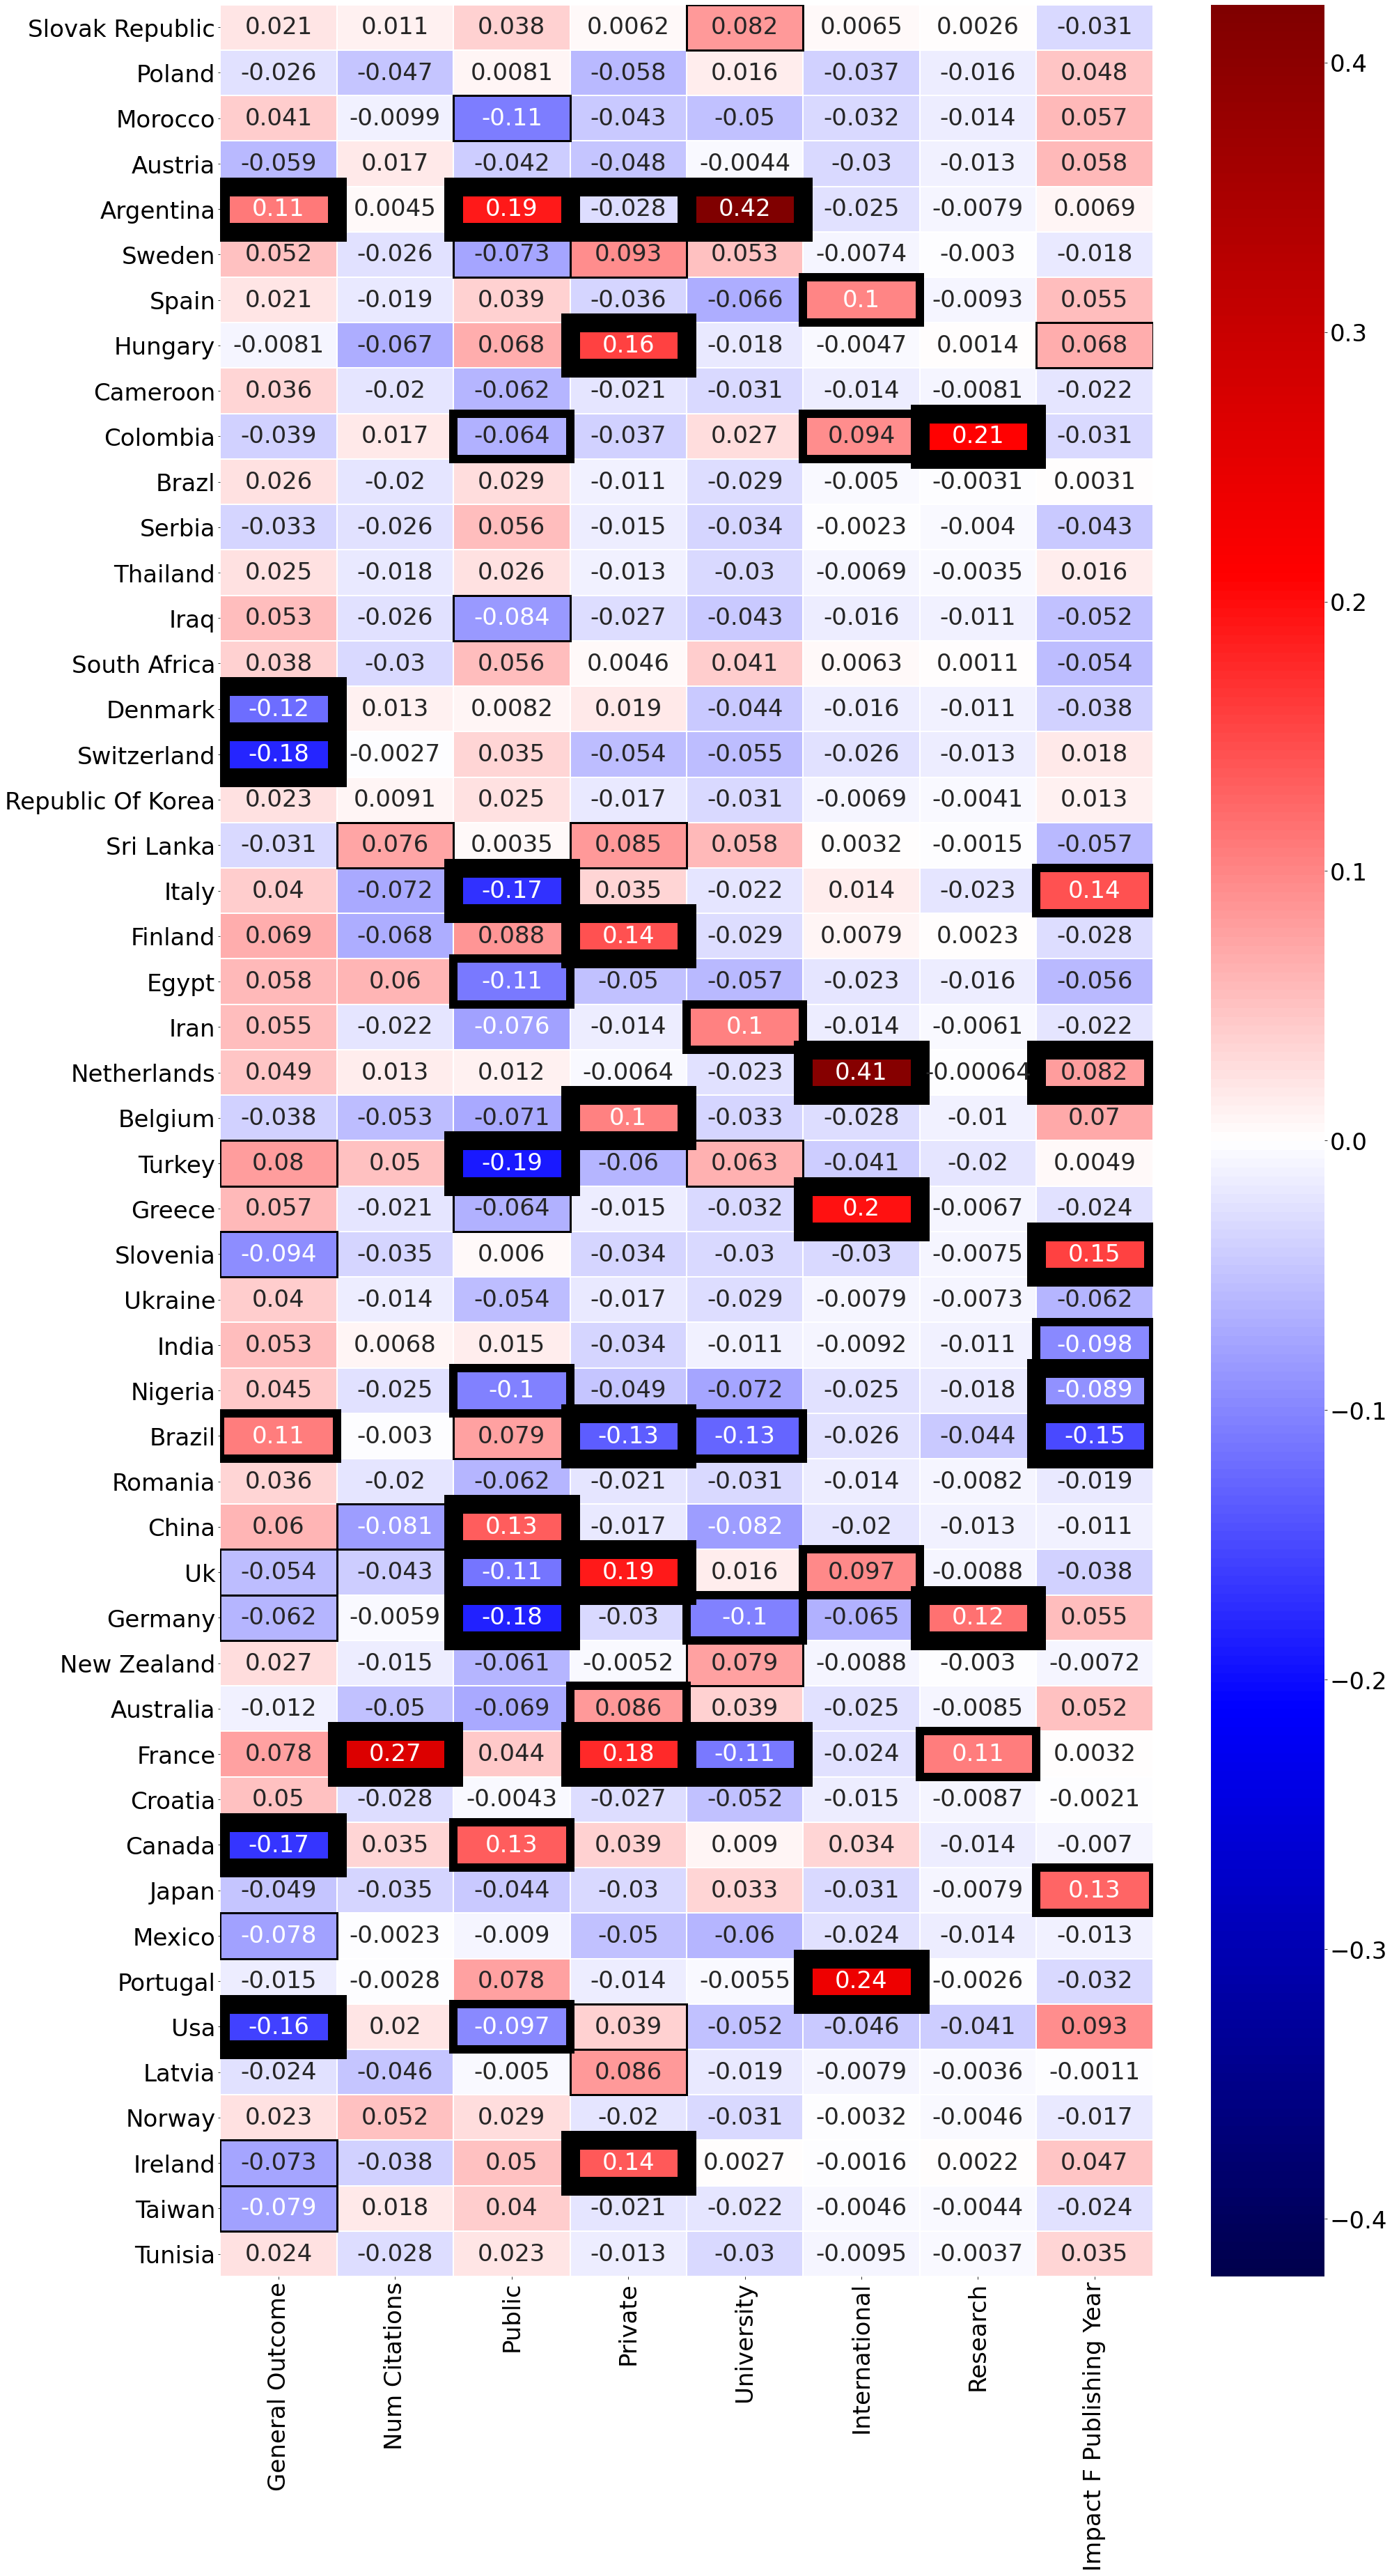

In [8]:
#econFreedomVisualizations.py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from matplotlib.patches import Rectangle
plot_df = pcorr_df.dropna()

plt.rcParams.update({'font.size': 34}) 

# pcorr_df.style.use(p_val_df.style.applymap(bold_sig).export())
fig, ax = plt.subplots(figsize = (30,60))
mx = np.abs(pcorr_df.max().max())
mn = np.abs(pcorr_df.min().min())
max_val = max([mx,mn])
min_val = max_val * -1
countries = plot_df.index
mp = sn.heatmap(plot_df, annot = True, linewidth=1,cmap = "seismic", ax=ax, vmin=min_val, vmax=max_val)
for i in range(len(keys)):
    for j in range(len(countries)):
        key = keys[i]
        country = countries[j]
        p_val = p_val_df.loc[country][key]
        lw = 0
        for k in range(len(sig_vals)):
            sig_val = sig_vals[k]
            if p_val <= sig_val:
                lw = 3 * (k + 1) ** 2
#         anchor = (lw / 2, lw / 2)
        mp.add_patch(Rectangle((i, j), 1, 1, fill=False, edgecolor='k', lw=lw))
plt.show()
# pcorr_df[p_val_df["General Outcome"] < sig]#.style.apply(highlight)
# pcorrsig[p_val_df["General Outcome"] < sig].to_csv("StatisticallySignificantOutcomesbyCountry.csv")
# p_val_df[p_val_df["General Outcome"] < sig].to_csv("StatisticalSignificancebyCountry.csv")

In [9]:
pcorr_df = pcorr_df.append(pd.DataFrame(pcorr_df.mean()).rename(columns = {0:"Mean"}).T)


In [10]:
from pgmpy.estimators import PC
c = PC(data[keys].dropna())
max_cond_vars = len(keys) - 2

sig =0.05
model = c.estimate(return_type = "dag", variant= "parallel", 
                   significance_level = sig, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()
pcorr = data.pcorr()
weights = {}

Working for n conditional variables: 5:  83%|████████████████████████████████████▋       | 5/6 [00:00<00:00,  7.52it/s]


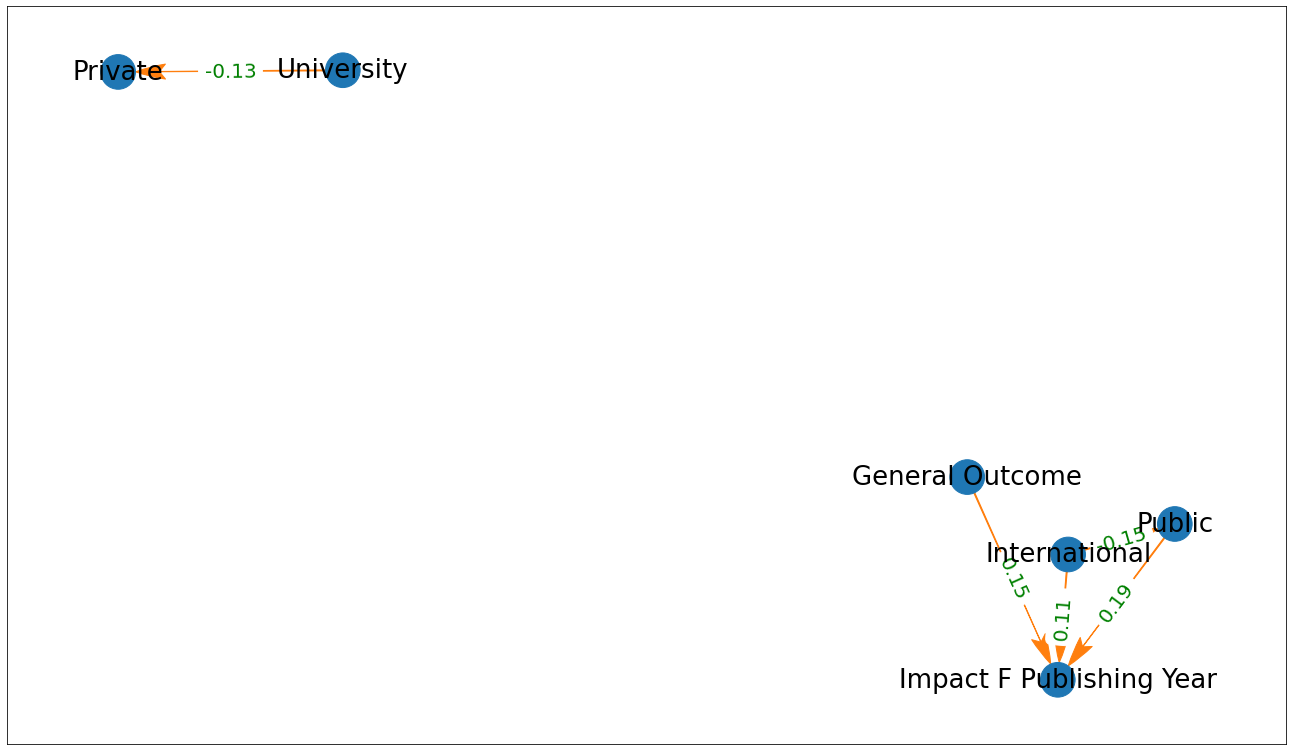

In [11]:
from matplotlib.patches import ArrowStyle
import networkx as nx
def graph_DAG(edges, df, title = ""):
    pcorr = df.pcorr()
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)

graph_DAG(edges, data)
    

In [12]:
def gen_pcorr(df, method = "pearson", sig = 0.01):
    # Correlation type:
    # 'pearson': Pearson r product-moment correlation
    # 'spearman': Spearman ρ rank-order correlation
    # 'kendall': Kendall’s τB correlation (for ordinal data)
    # 'bicor': Biweight midcorrelation (robust)
    # 'percbend': Percentage bend correlation (robust)
    # 'shepherd': Shepherd’s pi correlation (robust)
    # 'skipped': Skipped correlation (robust)
    pcs_dct = {}
    sig_corr_dct = {}
    for x in df.keys():
        sig_corr_dct[x] = []
        pcs_dct[x]={}
        for y in df.keys():
            # control variables
            # select variables that are not x or y
            other_vars = [z for z in df.keys() if z != y and z != x ]
            if x == y:
                # No need to calculate if the variable is itself
                pcs_dct[x][y] = 1
            else:
                pcs_dct[x][y] = df.partial_corr(x=x,y=y, covar=other_vars,
                                      method=method).round(3)
                if pcs_dct[x][y]["p-val"].values[0] < sig:
                    sig_corr_dct[x].append((y, pcs_dct[x][y]["r"].values[0]))

    return pcs_dct, sig_corr_dct

In [13]:
pcs_dct, sig_corr_dct = gen_pcorr(data[keys].fillna(0), method = "pearson", sig = 0.01)

import statsmodels.api as sm
import numpy
residuals = {}
partial_corr = {}
reg_df = data[keys].dropna()[:-1]
for y_var in keys:
    X_vars = [x for x in keys if x != y_var]
    X= reg_df[X_vars]
    X["constant"] = 1
    y = reg_df[y_var]
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    predict = results.predict()
    reg_df["predict"] = predict
    residuals[y_var] = reg_df["predict"].sub(reg_df[y_var])#results.resid

for x in keys:
    partial_corr[x] = {}
    for y in keys:
        if x != y:
            Y = pd.DataFrame(residuals[y])
            X = pd.DataFrame(residuals[x])
            model = sm.OLS(Y,X)
            results = model.fit()
            print(results.rsquared, results.pvalues)
            
            # check if statsmodels is correctly calcualting the error term... May be negative
            partial_corr[x][y] = np.corrcoef(residuals[x], residuals[y])[0][1] * -1
            print(partial_corr[x][y])
            print(pcs_dct[x][y])
        else:
            partial_corr[x][y] = 1

                            OLS Regression Results                            
Dep. Variable:        General Outcome   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.124
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0399
Time:                        14:27:53   Log-Likelihood:                -274.22
No. Observations:                 474   AIC:                             564.4
Df Residuals:                     466   BIC:                             597.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Num Citations           

<ipython-input-13-6c15ff118026>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1
<ipython-input-13-6c15ff118026>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1
<ipython-input-13-6c15ff118026>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

                               OLS Regression Results                               
Dep. Variable:     Impact F Publishing Year   R-squared:                       0.082
Model:                                  OLS   Adj. R-squared:                  0.068
Method:                       Least Squares   F-statistic:                     5.920
Date:                      Tue, 24 Aug 2021   Prob (F-statistic):           1.31e-06
Time:                              14:27:54   Log-Likelihood:                -901.05
No. Observations:                       474   AIC:                             1818.
Df Residuals:                           466   BIC:                             1851.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

0.0007588532746013454 0    0.549232
dtype: float64
-0.027547291601923422
           n      r          CI95%  p-val
pearson  475 -0.028  [-0.12, 0.06]  0.552
0.020803151632810657 0    0.001623
dtype: float64
0.14423297692556547
           n      r         CI95%  p-val
pearson  475  0.144  [0.05, 0.23]  0.002
0.0001652204313976613 0    0.779926
dtype: float64
-0.012853809995391955
           n      r         CI95%  p-val
pearson  475 -0.013  [-0.1, 0.08]  0.782
0.0006208977726062104 0    0.588008
dtype: float64
0.024917820382330747
           n      r          CI95%  p-val
pearson  475  0.025  [-0.07, 0.12]  0.591
0.003852379050399257 0    0.176866
dtype: float64
-0.062067536203712644
           n      r          CI95%  p-val
pearson  475 -0.062  [-0.15, 0.03]   0.18
0.0023825488615295543 0    0.288395
dtype: float64
-0.048811359963940884
           n      r          CI95%  p-val
pearson  475 -0.049  [-0.14, 0.04]  0.292
0.002817873480617905 0    0.248214
dtype: float64
-0.05308364607501

<ipython-input-13-6c15ff118026>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1


In [14]:
pd.DataFrame(partial_corr).sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True) 

,General Outcome,Impact F Publishing Year,International,Num Citations,Private,Public,Research,University
General Outcome,1.000000,0.093847,-0.041993,0.059828,-0.082824,0.049586,-0.012854,0.053747
Impact F Publishing Year,0.093847,1.000000,0.144233,0.094590,0.105185,0.202139,0.022117,0.051917
International,-0.041993,0.144233,1.000000,0.001815,-0.093859,-0.151368,-0.027547,-0.070782
Num Citations,0.059828,0.094590,0.001815,1.000000,0.153952,0.029036,0.024918,0.033936
Private,-0.082824,0.105185,-0.093859,0.153952,1.000000,-0.155873,-0.048811,-0.174668
Public,0.049586,0.202139,-0.151368,0.029036,-0.155873,1.000000,-0.062068,-0.050855
Research,-0.012854,0.022117,-0.027547,0.024918,-0.048811,-0.062068,1.000000,-0.053084
University,0.053747,0.051917,-0.070782,0.033936,-0.174668,-0.050855,-0.053084,1.000000


In [15]:
reg_df[keys].pcorr().sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True)

,General Outcome,Impact F Publishing Year,International,Num Citations,Private,Public,Research,University
General Outcome,1.000000,0.093847,-0.041993,0.059828,-0.082824,0.049586,-0.012854,0.053747
Impact F Publishing Year,0.093847,1.000000,0.144233,0.094590,0.105185,0.202139,0.022117,0.051917
International,-0.041993,0.144233,1.000000,0.001815,-0.093859,-0.151368,-0.027547,-0.070782
Num Citations,0.059828,0.094590,0.001815,1.000000,0.153952,0.029036,0.024918,0.033936
Private,-0.082824,0.105185,-0.093859,0.153952,1.000000,-0.155873,-0.048811,-0.174668
Public,0.049586,0.202139,-0.151368,0.029036,-0.155873,1.000000,-0.062068,-0.050855
Research,-0.012854,0.022117,-0.027547,0.024918,-0.048811,-0.062068,1.000000,-0.053084
University,0.053747,0.051917,-0.070782,0.033936,-0.174668,-0.050855,-0.053084,1.000000
